In [ ]:
from gensim.models import Word2Vec
import gensim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import networkx

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
import numpy as np
import sklearn as sk
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import operator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100") 
result = model.most_similar(positive=['woman', 'king'], negative=['man'])

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx?raw=true

--2021-11-15 12:41:05--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx [following]
--2021-11-15 12:41:05--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx [following]
--2021-11-15 12:41:05--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx?raw=true

--2021-11-15 12:41:05--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx [following]
--2021-11-15 12:41:05--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx [following]
--2021-11-15 12:41:05--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-

In [ ]:
def evaluation(x,y):
  score=0
  for i in x:
    syn1=wn.synsets(i.lower())
    cur_scores=[0]
    for j in y:
      syn2=wn.synsets(j.lower())
      if len(syn1)*len(syn2)>0 and wn.wup_similarity(syn1[0],syn2[0])!=None: 
        cur_scores.append(wn.wup_similarity(syn1[0],syn2[0]))
    #print(type(score),type(cur_scores))
    score+=max(cur_scores)
  return score/len(x)

In [ ]:
data=pd.read_excel("assignment3_data.xlsx?raw=true")

In [ ]:
data_true=np.array(pd.read_excel("assignment3_gold_labels.xlsx?raw=true")).flatten()

In [ ]:
data_true

array(['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence/knowledge', 'leadership', 'long term vision',
       'political skills ', 'relate to diverse groups', 'humble'],
      dtype=object)

In [ ]:
vocab=np.array(data).flatten()

In [ ]:
vocab_plus_similar_words=[]

In [ ]:
for i in vocab:
  for j in i.split(" "):
    try:
      j=j.strip(",")
      vocab_plus_similar_words.append(j.lower())
      for w in model.most_similar(j):
        vocab_plus_similar_words.append(w[0].lower())
    except KeyError:
      pass

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
filtered_words=[]
for i in nltk.pos_tag(vocab_plus_similar_words):
  if i[0] not in stop_words:
    if i[1]=="NN" or i[1][0]=="J" or i[1]=="NNS" :
      filtered_words.append(i[0])

In [ ]:
filter_words=list(set(filtered_words))

In [ ]:
len(vocab_plus_similar_words),len(set(vocab_plus_similar_words)),len(filter_words),len(filtered_words)

(2756, 1048, 744, 1351)

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx?raw=true

--2021-11-15 12:41:13--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx [following]
--2021-11-15 12:41:13--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx [following]
--2021-11-15 12:41:13--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-

In [ ]:
gold_standard=pd.read_excel("assignment3_gold_labels.xlsx?raw=true")

In [ ]:
gold_standard=np.array(gold_standard).flatten()

In [ ]:
gold_standard

array(['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence/knowledge', 'leadership', 'long term vision',
       'political skills ', 'relate to diverse groups', 'humble'],
      dtype=object)

In [ ]:
from collections import defaultdict,OrderedDict

In [ ]:
frequency_counter=defaultdict(int)
for i in filtered_words:
  frequency_counter[i]+=1

In [ ]:
frequency_counter = sorted(frequency_counter.items(), key=lambda x: x[1])    

In [ ]:
for i in frequency_counter:
  if (i[1]>4):
    print(i[0],end=" ")

respect devotion desire willingness skills better abilities president former smart happy intelligent last people administration tenacity perseverance toughness thing sense many integrity fairness knowledge party government others policy selflessness way experience leaders political determination humility leader professionalism commitment give kind leadership courage honesty help good able first part 

In [ ]:
gold_standard

array(['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence/knowledge', 'leadership', 'long term vision',
       'political skills ', 'relate to diverse groups', 'humble'],
      dtype=object)

In [ ]:
#a

In [ ]:
vectors=[]
vocab_final=[]
for i in filter_words:
  try:
    vectors.append(model[i.rstrip(".")])
    vocab_final.append(i)
  except KeyError:
    print(i)

i'm


In [ ]:
len(vocab_final),len(vectors)

(743, 743)

In [ ]:
from sklearn.cluster import KMeans
error=[]
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(vectors)
  error.append(kmeans.inertia_)

Text(0, 0.5, 'Cummulative Inertia')

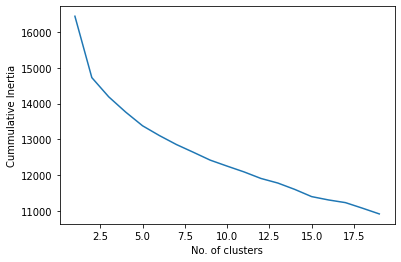

In [ ]:
plt.plot(list(range(1,20)),error)
plt.xlabel("No. of clusters")
plt.ylabel("Cummulative Inertia")

In [ ]:
kmeans_best = KMeans(n_clusters=5, random_state=0).fit(vectors)

In [ ]:
labels=kmeans_best.labels_

In [ ]:
FINAL_WORDS=[]
for c in kmeans_best.cluster_centers_:
  for index,j in enumerate(vectors):
    if np.sum(np.abs(c-j))<22:
      #print("..")
      print(vocab_final[index],end=" ")
      FINAL_WORDS.append(vocab_final[index].strip("."))

sort come sure sure. well means kind better rest way thoughtfulness boldness fearlessness amiable fun-loving hot-tempered self-confident open-minded particular 

In [ ]:
evaluation(FINAL_WORDS,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.32627533285428023

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_vectors=pca.fit_transform(vectors)

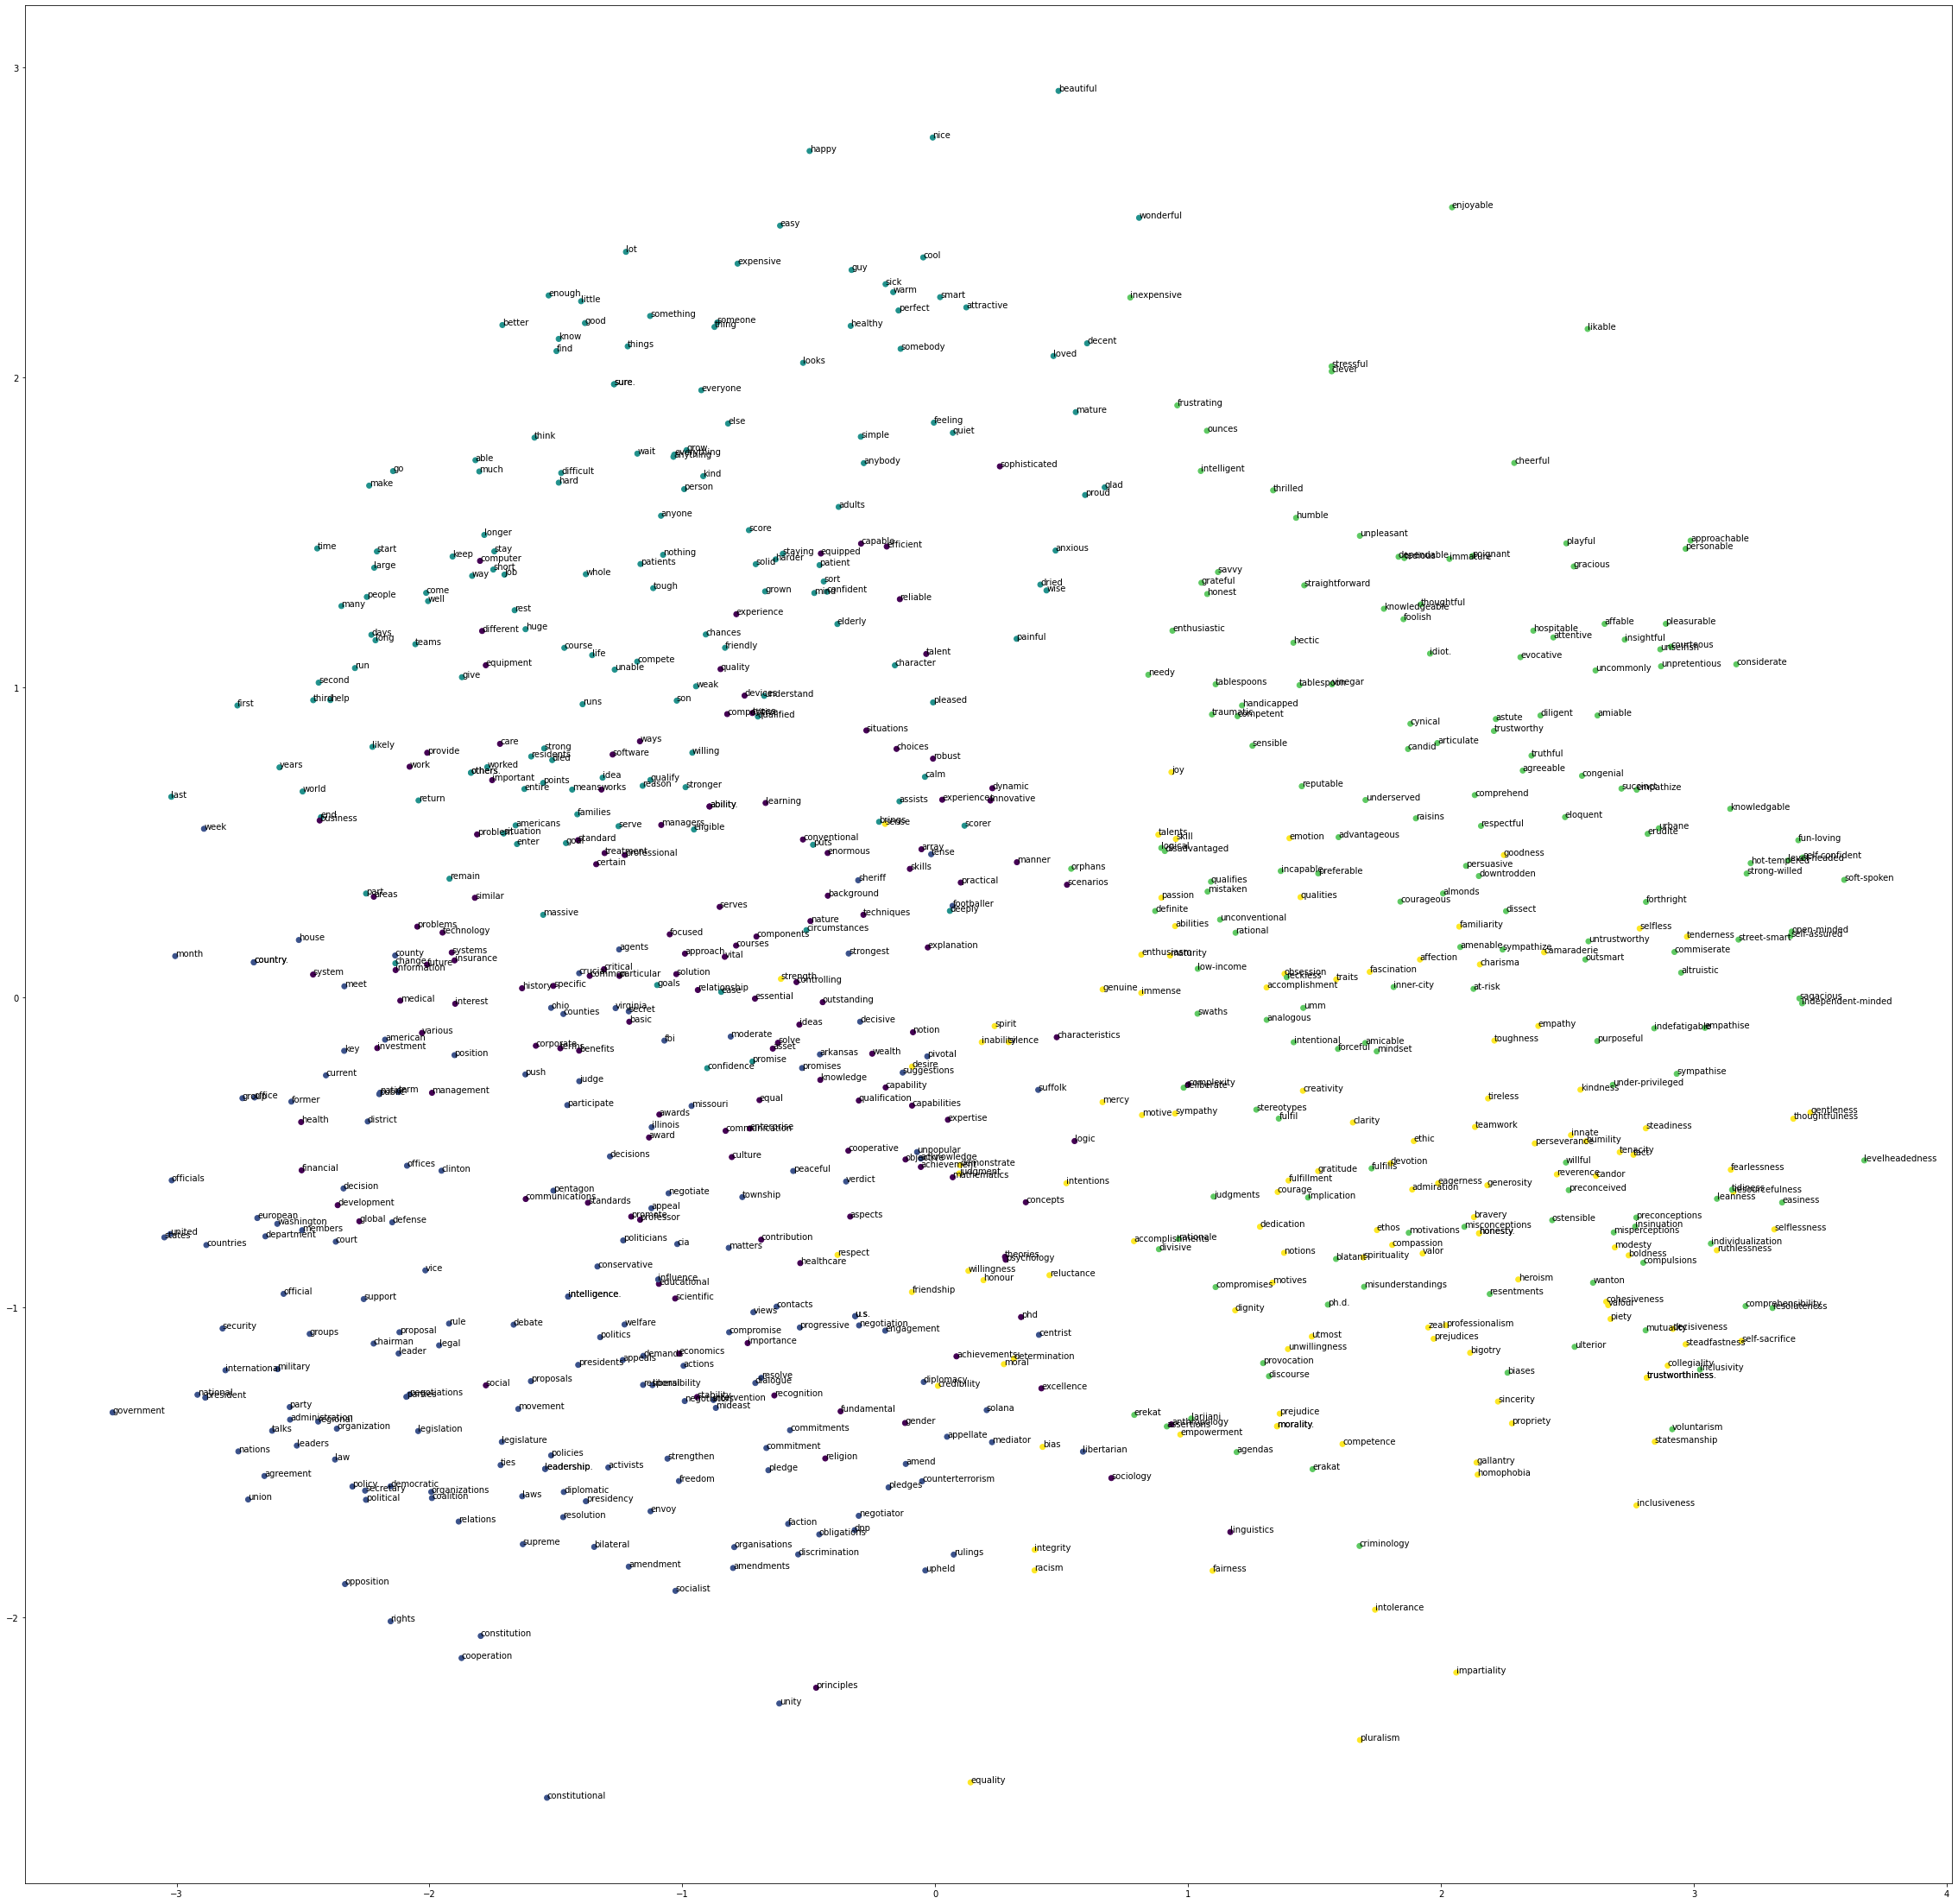

In [ ]:
plt.figure(figsize=(40,40))
plt.scatter(pca_vectors[:,0],pca_vectors[:,1],c=labels)
for i,txt in enumerate(vocab_final):
  plt.annotate(txt,(pca_vectors[i][0],pca_vectors[i][1]))